<a href="https://colab.research.google.com/github/Carapet07/Data-Science-projects/blob/main/HandwrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A small project based on the mnist datasetModified National Institute of Standards and Technology database) is a large database of handwritten digits. The final model will be able to distinguish numbers from 1 to 9

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizing the data into a range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# making validation set from the test set
# 40% will be used for validation and 60 for test
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.4, random_state=42)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


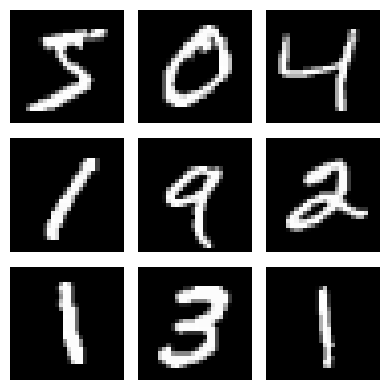

In [3]:
rows, cols = 3, 3

fig, axes = plt.subplots(rows, cols, figsize=(4, 4))

for i, ax in enumerate(axes.flat):
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')

plt.tight_layout()
plt.show()

Since the dataset is already huge there is no need to apply data augumentation to artificially expand it

In [4]:
data_augmentation = keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    data_augmentation,
    # 1st block
    layers.Conv2D(64, 3, activation='relu', use_bias=False),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2),
    # 2nd
    layers.Conv2D(128, 3, activation='relu', use_bias=False),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2),
    # 3rd
    layers.Conv2D(258, 3, activation='relu', use_bias=False),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2),

    layers.Flatten(),

    layers.Dense(128, activation='relu', use_bias=True),
    # output layer with 10 neurons
    # 10 because we have 10 labels(digits between 0 and 9)
    layers.Dense(10, activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,
                                               restore_best_weights=True)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=20, callbacks=[early_stopping]
                    )

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9034 - loss: 0.2989 - val_accuracy: 0.9532 - val_loss: 0.1552
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9681 - loss: 0.0989 - val_accuracy: 0.9732 - val_loss: 0.0944
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9762 - loss: 0.0767 - val_accuracy: 0.9787 - val_loss: 0.0689
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9798 - loss: 0.0666 - val_accuracy: 0.9825 - val_loss: 0.0534
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9820 - loss: 0.0567 - val_accuracy: 0.9760 - val_loss: 0.0895
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9837 - loss: 0.0531 - val_accuracy: 0.9872 - val_loss: 0.0414
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9848 - loss: 0.0479 - val_accuracy: 0.9833 - val_loss: 0.0538
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9852 - loss: 0

In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9900 - loss: 0.0309
Test Accuracy: 0.99


In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 258)           │         297,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 258)           │           1,032 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 258)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 258)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          33,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,221,488 (4.66 MB)

 Trainable params: 406,862 (1.55 MB)

 Non-trainable params: 900 (3.52 KB)

 Optimizer params: 813,726 (3.10 MB)

Plotting the loss and accuracy of the model

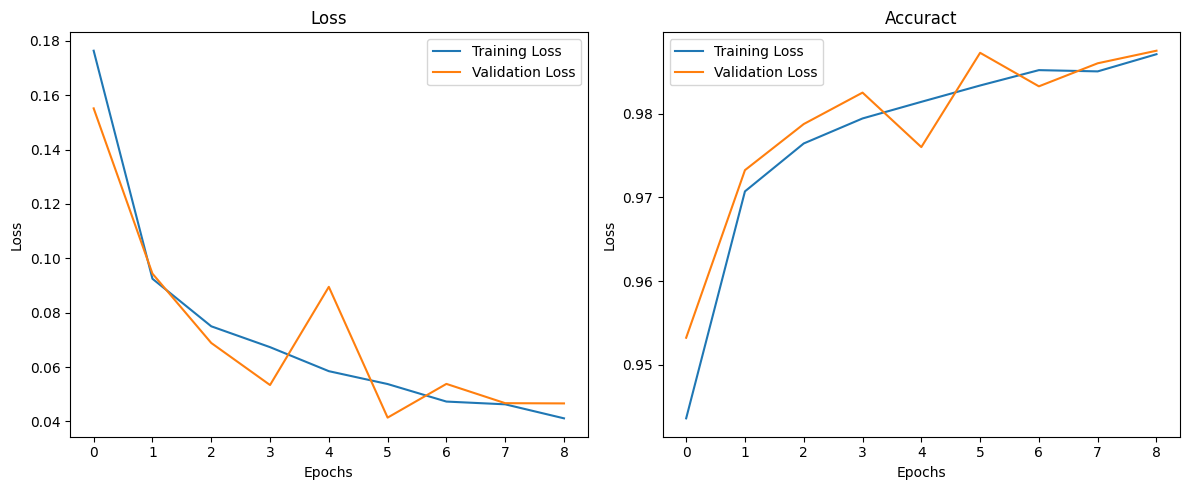

In [7]:
# Extracting values from history
training_loss = history.history['loss']
valid_loss = history.history['val_loss']
training_accuracy = history.history.get('accuracy')
valid_accuracy = history.history.get('val_accuracy')

plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(valid_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)

if training_accuracy and valid_accuracy:
  plt.plot(training_accuracy, label='Training Loss')
  plt.plot(valid_accuracy, label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Accuract')
  plt.legend()


plt.tight_layout()
plt.show()